In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pln_iefc_sims_phaseamp_ab import *

In [12]:
probe_mode_1 = (zernikes[4]+zernikes[5]+zernikes[6]+zernikes[7])/np.sqrt(4)
probe_mode_2 = (zernikes[4]-zernikes[5]+zernikes[6]-zernikes[7])/np.sqrt(4)

probe_modes = np.array([probe_mode_1,probe_mode_2])

control_ports = [0,1,2,3]

In [13]:
dm.zeroAll()

resmatrix  = calibrate(dm,probe_amplitude,probe_modes,calibration_amplitude,calibration_modes,perfect_lantern=True,control_ports=control_ports)
control_matrix = beta_reg(resmatrix)

meas_1, dm_hist_1, coeffs_1 = run(dm, context,
        control_matrix,
        probe_modes, probe_amplitude,
        calibration_modes,
        num_iterations=10, 
        loop_gain=0.5,perfect_lantern=True,control_ports=control_ports)

resmatrix  = calibrate(dm,probe_amplitude/3,probe_modes,calibration_amplitude/3,calibration_modes,perfect_lantern=True,control_ports=control_ports)
control_matrix = beta_reg(resmatrix)

meas_2, dm_hist_2, coeffs_2 = run(dm, context,
        control_matrix,
        probe_modes, probe_amplitude/3,
        calibration_modes,
        num_iterations=20, 
        loop_gain=0.5,perfect_lantern=True,control_ports=control_ports)

resmatrix  = calibrate(dm,probe_amplitude/10,probe_modes,calibration_amplitude/10,calibration_modes,perfect_lantern=True,control_ports=control_ports)
control_matrix = beta_reg(resmatrix,-2)

meas_3, dm_hist_3, coeffs_3 = run(dm, context,
        control_matrix,
        probe_modes, probe_amplitude/10,
        calibration_modes,
        num_iterations=20, 
        loop_gain=0.5,perfect_lantern=True,control_ports=control_ports)

Calibrating iEFC...
	Calibrated mode 27 / 27 in 2.51s
Calibration complete.
Running iEFC...
iEFC loop completed in 0.599s.
Calibrating iEFC...
	Calibrated mode 27 / 27 in 2.38s
Calibration complete.
Running iEFC...
iEFC loop completed in 0.936s.
Calibrating iEFC...
	Calibrated mode 27 / 27 in 2.47s
Calibration complete.
Running iEFC...
iEFC loop completed in 0.969s.


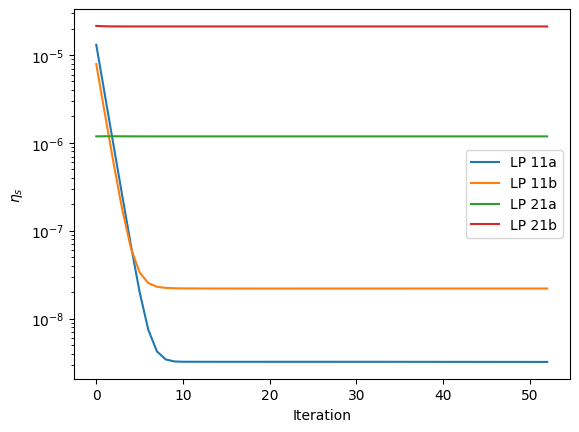

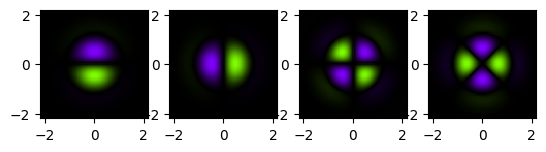

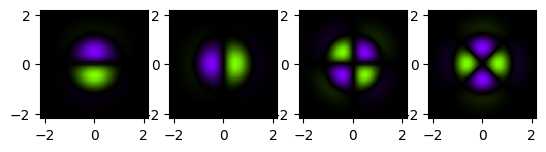

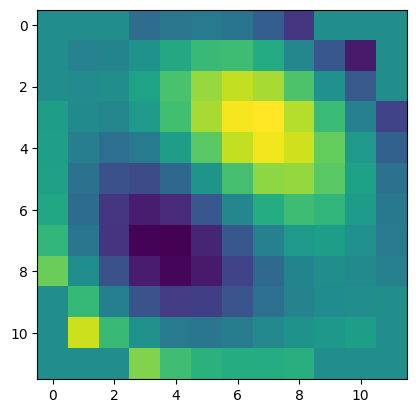

In [14]:
null_ports = ['LP 11a', 'LP 11b', 'LP 21a', 'LP 21b']

plt.figure()
plt.semilogy(np.vstack((meas_1,meas_2,meas_3)), label=null_ports)
#plt.ylim([1e-5,1e-2])
plt.xlabel('Iteration')
plt.ylabel(r'$\eta_s$')
plt.legend()
plt.show()

last_dm = dm_hist_3[-1]
outputs_before,integrands_before = prop_pln_perfect(dm1_acts=None,return_integrand=True)
outputs,integrands = prop_pln_perfect(dm1_acts=last_dm.ravel(),return_integrand=True)

plt.figure()
for n in range(4):
    plt.subplot(1,4,n+1)
    imshow_field(integrands_before[n+1])
plt.show()
plt.figure()
for n in range(4):
    plt.subplot(1,4,n+1)
    imshow_field(integrands[n+1])
plt.show()

plt.figure()
plt.imshow(last_dm)